In [ ]:
!wget https://www.cs.toronto.edu/~kriz/cifar-10-python.tar.gz

--2020-11-18 15:42:05--  https://www.cs.toronto.edu/~kriz/cifar-10-python.tar.gz
Resolving www.cs.toronto.edu (www.cs.toronto.edu)... 128.100.3.30
Connecting to www.cs.toronto.edu (www.cs.toronto.edu)|128.100.3.30|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 170498071 (163M) [application/x-gzip]
Saving to: ‘cifar-10-python.tar.gz’

cifar-10-python.tar 100%[===================>] 162.60M  62.2MB/s    in 2.6s    

2020-11-18 15:42:08 (62.2 MB/s) - ‘cifar-10-python.tar.gz’ saved [170498071/170498071]



In [ ]:
!tar -xvzf cifar-10-python.tar.gz

cifar-10-batches-py/
cifar-10-batches-py/data_batch_4
cifar-10-batches-py/readme.html
cifar-10-batches-py/test_batch
cifar-10-batches-py/data_batch_3
cifar-10-batches-py/batches.meta
cifar-10-batches-py/data_batch_2
cifar-10-batches-py/data_batch_5
cifar-10-batches-py/data_batch_1


In [ ]:
import numpy as np
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt

In [ ]:
def unpickle(file):
    import pickle
    with open(file, 'rb') as fo:
        dict = pickle.load(fo, encoding='bytes')
    return dict

In [ ]:
data = unpickle('cifar-10-batches-py/data_batch_1')
print(data.keys())

dict_keys([b'batch_label', b'labels', b'data', b'filenames'])


In [ ]:
X = np.array(data[b'data'])
y = np.array(data[b'labels'])

In [ ]:
print(X.shape, y.shape)

(10000, 3072) (10000,)


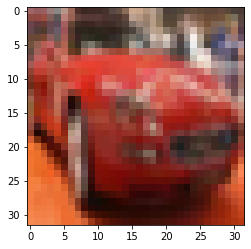

In [ ]:
plt.imshow(X[5].reshape(3, 32, 32).transpose([1, 2, 0]))

In [ ]:
# normalization
X = X / 255

In [ ]:
r = np.random.permutation(X.shape[0])

X = X[r]
y = y[r]

In [ ]:
X_train = X[:-1000]
X_test = X[1000:]

y_train = y[:-1000]
y_test = y[1000:]

In [ ]:
clf = MLPClassifier(hidden_layer_sizes=[100], batch_size=64,
                    max_iter=1, warm_start=True)

In [ ]:
clf.fit(X_train, y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:573: UserWarning: Training interrupted by user.
  warnings.warn("Training interrupted by user.")


MLPClassifier(activation='relu', alpha=0.0001, batch_size=64, beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=[60000], learning_rate='constant',
              learning_rate_init=0.001, max_fun=15000, max_iter=20,
              momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
              power_t=0.5, random_state=None, shuffle=True, solver='adam',
              tol=0.0001, validation_fraction=0.1, verbose=False,
              warm_start=False)

/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:573: UserWarning: Training interrupted by user.
  warnings.warn("Training interrupted by user.")


<function matplotlib.pyplot.legend>

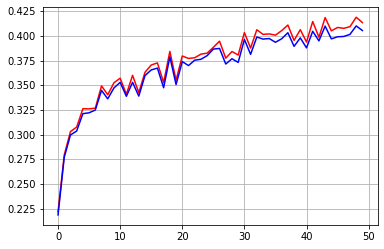

In [ ]:
acc_train = []
acc_test = []

for i in range(50):
  clf.fit(X_train, y_train)
  acc_train.append(clf.score(X_train, y_train))
  acc_test.append(clf.score(X_test, y_test))

plt.plot(acc_train, 'r-', label='acc_tran')
plt.plot(acc_test, 'b-', label='acc_test')
plt.grid()
plt.legend()

([<matplotlib.axis.YTick at 0x7f2cf28e9ac8>,
 [Text(0, 0, 'airplane'),
  Text(0, 0, 'automobile'),
  Text(0, 0, 'bird'),
  Text(0, 0, 'cat'),
  Text(0, 0, 'deer'),
  Text(0, 0, 'dog'),
  Text(0, 0, 'frog'),
  Text(0, 0, 'horse'),
  Text(0, 0, 'ship'),
  Text(0, 0, 'truck')])

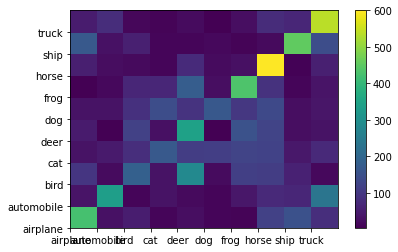

In [ ]:
pred = clf.predict(X_test)

cm = confusion_matrix(y_test, pred)

plt.pcolormesh(cm)
plt.colorbar()

plt.xticks(range(10), ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck'])
plt.yticks(range(10), ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck'])

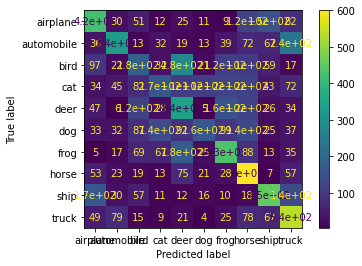

In [ ]:
from sklearn.metrics import plot_confusion_matrix

class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
disp = plot_confusion_matrix(clf, X_test, y_test,
                                 display_labels=class_names)